<a href="https://colab.research.google.com/github/davlix/Uts-Pengolahan-Citra/blob/master/UTS_Pengolahan_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check versi untuk package dari imageio, numpy, dan matplotlib

In [3]:
import imageio
import numpy
import matplotlib

print(imageio.__version__)
print(numpy.__version__)
print(matplotlib.__version__)

2.36.1
1.26.4
3.8.0


Program ini meningkatkan kualitas gambar menggunakan dua teknik utama: Histogram Equalization dan Penyesuaian Kontras. Gambar asli diubah ke grayscale, diproses untuk meningkatkan kontras, dan dibandingkan menggunakan metrik MSE dan PSNR. Hasil visualisasi mencakup gambar yang diproses serta histogram intensitas piksel sebelum dan sesudah pemrosesan.

Saving blur.jpg to blur (5).jpg


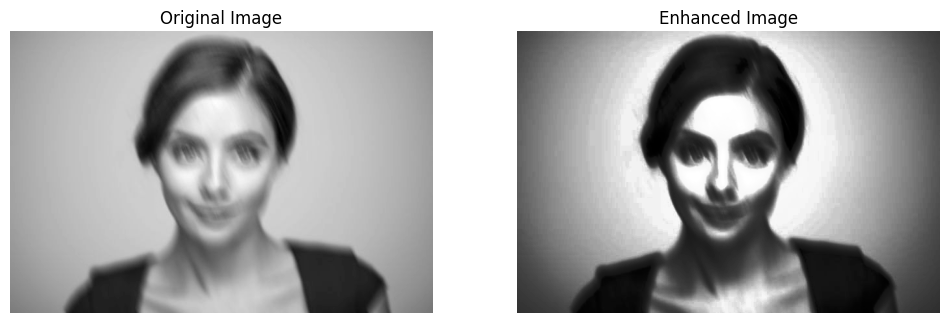

In [11]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
original_image = iio.imread(file_name)

def rgb2gray(image):
    if len(image.shape) == 3:
        return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    return image

gray_image = rgb2gray(original_image)

def histogram_equalization(image):
    image_flattened = image.flatten()

    hist, bins = np.histogram(image_flattened, bins=256, range=[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]

    equalized = np.interp(image_flattened, bins[:-1], cdf_normalized * 255)
    return equalized.reshape(image.shape)

enhanced_image = histogram_equalization(gray_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Enhanced Image")
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')

plt.show()


Program ini mengolah gambar menggunakan dua teknik peningkatan kontras: Histogram Equalization dan Penyesuaian Kontras dengan level 1.5. Program membaca gambar, mengonversinya ke skala abu-abu, dan menerapkan kedua teknik tersebut. Hasil citra asli, citra yang telah diproses, serta histogram intensitas piksel ditampilkan untuk membandingkan distribusi kontras sebelum dan sesudah pengolahan.

Saving blur.jpg to blur (3).jpg


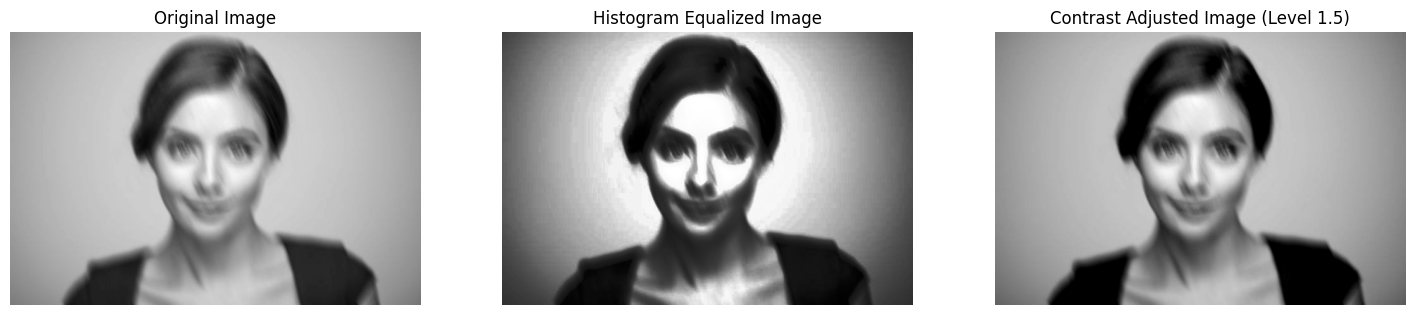

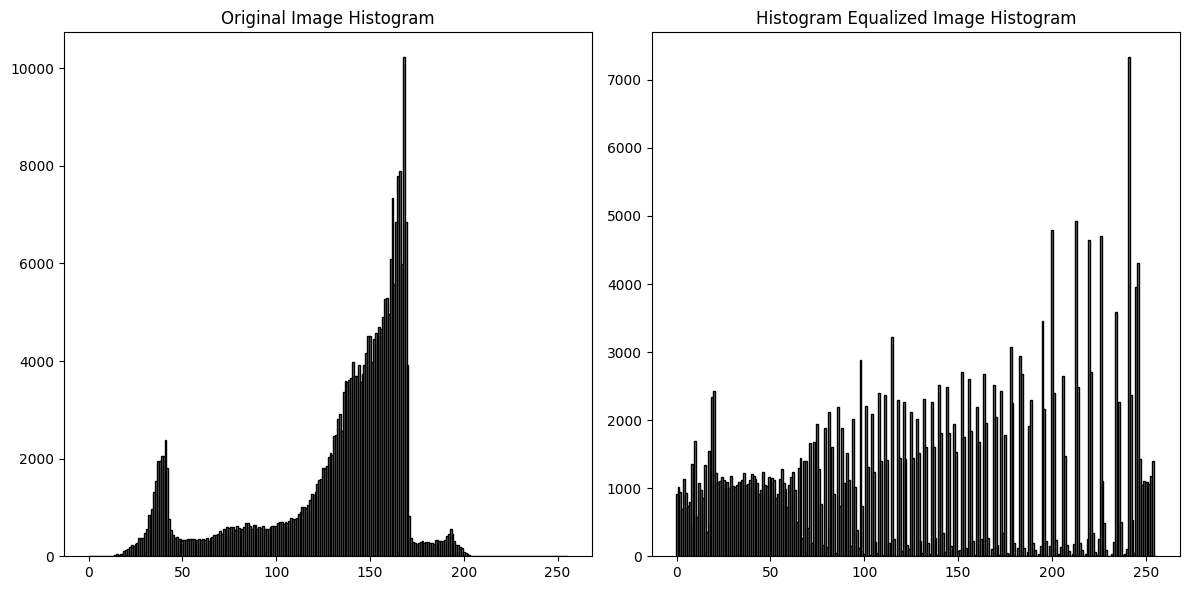

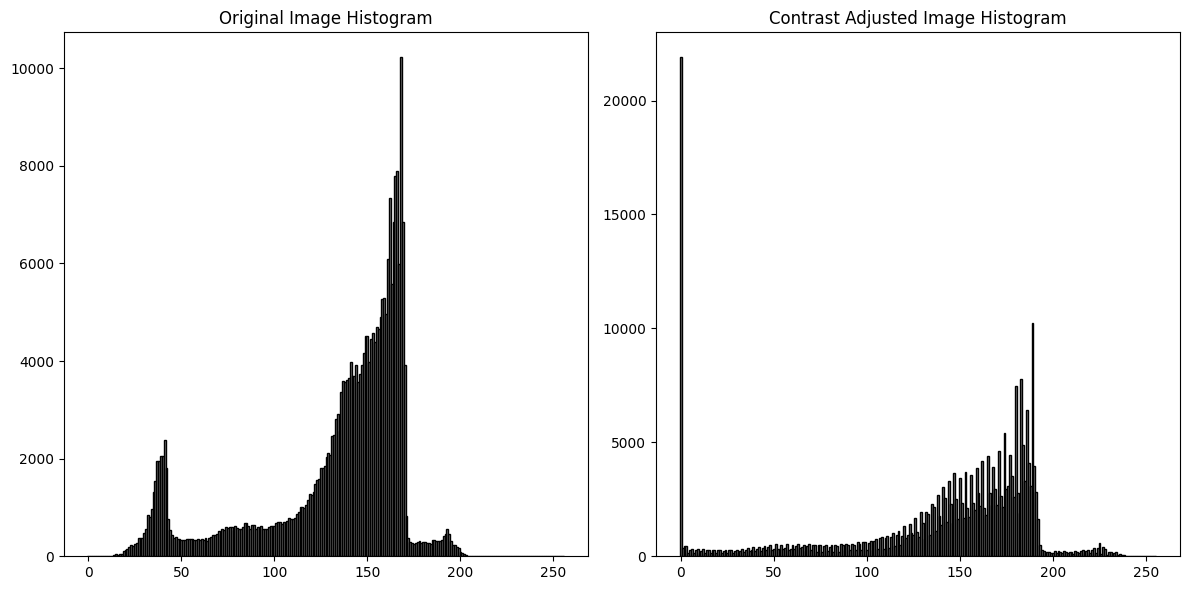

In [8]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
original_image = iio.imread(file_name)

def rgb2gray(image):
    if len(image.shape) == 3:
        return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    return image

gray_image = rgb2gray(original_image)

def histogram_equalization(image):
    image_flattened = image.flatten()
    hist, bins = np.histogram(image_flattened, bins=256, range=[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]
    equalized = np.interp(image_flattened, bins[:-1], cdf_normalized * 255)
    return equalized.reshape(image.shape)

def adjust_contrast(image, level):
    image_normalized = image / 255.0
    adjusted = np.clip(0.5 + level * (image_normalized - 0.5), 0, 1) * 255
    return adjusted

def calculate_histogram(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
    return hist, bins

def plot_histograms(image1, image2, title1, title2):
    hist1, bins1 = calculate_histogram(image1)
    hist2, bins2 = calculate_histogram(image2)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.bar(bins1[:-1], hist1, width=1, color='gray', edgecolor='black')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.bar(bins2[:-1], hist2, width=1, color='gray', edgecolor='black')

    plt.tight_layout()
    plt.show()

enhanced_image = histogram_equalization(gray_image)
contrast_image = adjust_contrast(gray_image, 1.5)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Histogram Equalized Image")
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Contrast Adjusted Image (Level 1.5)")
plt.imshow(contrast_image, cmap='gray')
plt.axis('off')

plt.show()

plot_histograms(gray_image, enhanced_image, "Original Image Histogram", "Histogram Equalized Image Histogram")
plot_histograms(gray_image, contrast_image, "Original Image Histogram", "Contrast Adjusted Image Histogram")
